# Part 1: Sentiment Analysis via the ML-based approach



### Part 1.a. Loading and Prep

Load, clean, and preprocess the data as you find necessary.

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Load necessary libraries
from google.colab import files
import io

# Upload the dataset
uploaded = files.upload()

# Read the CSV file into a DataFrame
df_train = pd.read_csv(io.BytesIO(uploaded['sentiment_train.csv']), header=0, sep=",")
df_train.head()

Saving sentiment_train.csv to sentiment_train.csv


,Sentence,Polarity
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
# Upload the dataset
uploaded = files.upload()

# Read the CSV file into a DataFrame
df_test = pd.read_csv(io.BytesIO(uploaded['sentiment_test.csv']), header=0, sep=",")
df_test.head()

Saving sentiment_test.csv to sentiment_test.csv


,Sentence,Polarity
0,A good commentary of today's love and undoubte...,1
1,For people who are first timers in film making...,1
2,"It was very popular when I was in the cinema, ...",1
3,It's a feel-good film and that's how I felt wh...,1
4,It has northern humour and positive about the ...,1


In [ ]:
print(df_train.info())
#no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  2400 non-null   object
 1   Polarity  2400 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 37.6+ KB
None


In [ ]:
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  600 non-null    object
 1   Polarity  600 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.5+ KB
None


<Axes: >

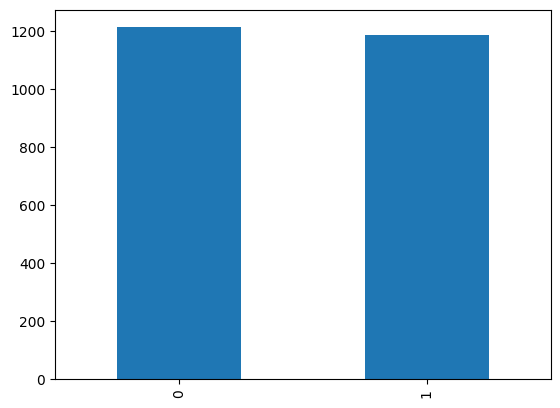

In [ ]:
# bar plot
df_train['Polarity'].value_counts().plot.bar()
#Looks like the train dataset is well balanced

I will do all text preprocessing steps twice: for train and test datasets. I do not use a pipeline as there are only 3 steps to do and also I could combine 2 datesets, do preprocessing and then split back before vectorization step. But I decided to do preprocessing that way as it seemed easier for me.

##1. Word Tokenization


In [ ]:
# word_tokenize function
df_train['words'] = [word_tokenize(sentence) for sentence in df_train['Sentence']]

In [ ]:
df_train.head(3)

,Sentence,Polarity,words
0,Wow... Loved this place.,1,"[Wow, ..., Loved, this, place, .]"
1,Crust is not good.,0,"[Crust, is, not, good, .]"
2,Not tasty and the texture was just nasty.,0,"[Not, tasty, and, the, texture, was, just, nas..."


In [ ]:
df_test['words'] = [word_tokenize(sentence) for sentence in df_test['Sentence']]

In [ ]:
df_test.head(3)

,Sentence,Polarity,words
0,A good commentary of today's love and undoubte...,1,"[A, good, commentary, of, today, 's, love, and..."
1,For people who are first timers in film making...,1,"[For, people, who, are, first, timers, in, fil..."
2,"It was very popular when I was in the cinema, ...",1,"[It, was, very, popular, when, I, was, in, the..."


## 2. Stop Words Removal


In [ ]:
# simple list comprehension to exclude stop words
df_train['words_without_stopwords'] = df_train['words'].apply(lambda words: [word for word in words if word.lower() not in stopwords.words('english')])

In [ ]:
df_train.head(3)

,Sentence,Polarity,words,words_without_stopwords
0,Wow... Loved this place.,1,"[Wow, ..., Loved, this, place, .]","[Wow, ..., Loved, place, .]"
1,Crust is not good.,0,"[Crust, is, not, good, .]","[Crust, good, .]"
2,Not tasty and the texture was just nasty.,0,"[Not, tasty, and, the, texture, was, just, nas...","[tasty, texture, nasty, .]"


In [ ]:
df_test['words_without_stopwords'] = df_test['words'].apply(lambda words: [word for word in words if word.lower() not in stopwords.words('english')])

In [ ]:
df_test.head(3)

,Sentence,Polarity,words,words_without_stopwords
0,A good commentary of today's love and undoubte...,1,"[A, good, commentary, of, today, 's, love, and...","[good, commentary, today, 's, love, undoubtedl..."
1,For people who are first timers in film making...,1,"[For, people, who, are, first, timers, in, fil...","[people, first, timers, film, making, ,, think..."
2,"It was very popular when I was in the cinema, ...",1,"[It, was, very, popular, when, I, was, in, the...","[popular, cinema, ,, good, house, good, reacti..."


## I decided not to Remove Punctuations as it might contain some important info

##3. Lemmatization


In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
df_train['lemma'] = df_train['words_without_stopwords'].apply(lambda words: [lemmatizer.lemmatize(word).lower() for word in words])

In [ ]:
df_train.head(3)

,Sentence,Polarity,words,words_without_stopwords,lemma
0,Wow... Loved this place.,1,"[Wow, ..., Loved, this, place, .]","[Wow, ..., Loved, place, .]","[wow, ..., loved, place, .]"
1,Crust is not good.,0,"[Crust, is, not, good, .]","[Crust, good, .]","[crust, good, .]"
2,Not tasty and the texture was just nasty.,0,"[Not, tasty, and, the, texture, was, just, nas...","[tasty, texture, nasty, .]","[tasty, texture, nasty, .]"


In [ ]:
df_test['lemma'] = df_test['words_without_stopwords'].apply(lambda words: [lemmatizer.lemmatize(word).lower() for word in words])

In [ ]:
df_test.head(3)

,Sentence,Polarity,words,words_without_stopwords,lemma
0,A good commentary of today's love and undoubte...,1,"[A, good, commentary, of, today, 's, love, and...","[good, commentary, today, 's, love, undoubtedl...","[good, commentary, today, 's, love, undoubtedl..."
1,For people who are first timers in film making...,1,"[For, people, who, are, first, timers, in, fil...","[people, first, timers, film, making, ,, think...","[people, first, timer, film, making, ,, think,..."
2,"It was very popular when I was in the cinema, ...",1,"[It, was, very, popular, when, I, was, in, the...","[popular, cinema, ,, good, house, good, reacti...","[popular, cinema, ,, good, house, good, reacti..."


##4. TF-IDF


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [ ]:
df_train['lemmas_as_strings'] = [' '.join(lemma) for lemma in df_train['lemma']]
df_test['lemmas_as_strings'] = [' '.join(lemma) for lemma in df_test['lemma']]

In [ ]:
df_train.head(3)

,Sentence,Polarity,words,words_without_stopwords,lemma,lemmas_as_strings
0,Wow... Loved this place.,1,"[Wow, ..., Loved, this, place, .]","[Wow, ..., Loved, place, .]","[wow, ..., loved, place, .]",wow ... loved place .
1,Crust is not good.,0,"[Crust, is, not, good, .]","[Crust, good, .]","[crust, good, .]",crust good .
2,Not tasty and the texture was just nasty.,0,"[Not, tasty, and, the, texture, was, just, nas...","[tasty, texture, nasty, .]","[tasty, texture, nasty, .]",tasty texture nasty .


In [ ]:
df_test.head(9)

,Sentence,Polarity,words,words_without_stopwords,lemma,lemmas_as_strings
0,A good commentary of today's love and undoubte...,1,"[A, good, commentary, of, today, 's, love, and...","[good, commentary, today, 's, love, undoubtedl...","[good, commentary, today, 's, love, undoubtedl...",good commentary today 's love undoubtedly film...
1,For people who are first timers in film making...,1,"[For, people, who, are, first, timers, in, fil...","[people, first, timers, film, making, ,, think...","[people, first, timer, film, making, ,, think,...","people first timer film making , think excelle..."
2,"It was very popular when I was in the cinema, ...",1,"[It, was, very, popular, when, I, was, in, the...","[popular, cinema, ,, good, house, good, reacti...","[popular, cinema, ,, good, house, good, reacti...","popular cinema , good house good reaction plen..."
3,It's a feel-good film and that's how I felt wh...,1,"[It, 's, a, feel-good, film, and, that, 's, ho...","['s, feel-good, film, 's, felt, came, cinema, !]","['s, feel-good, film, 's, felt, came, cinema, !]",'s feel-good film 's felt came cinema !
4,It has northern humour and positive about the ...,1,"[It, has, northern, humour, and, positive, abo...","[northern, humour, positive, community, repres...","[northern, humour, positive, community, repres...",northern humour positive community represents .
5,I rather enjoyed it.,1,"[I, rather, enjoyed, it, .]","[rather, enjoyed, .]","[rather, enjoyed, .]",rather enjoyed .
6,I liked it.,1,"[I, liked, it, .]","[liked, .]","[liked, .]",liked .
7,I couldn't take them seriously.,0,"[I, could, n't, take, them, seriously, .]","[could, n't, take, seriously, .]","[could, n't, take, seriously, .]",could n't take seriously .
8,It really created a unique feeling though.,1,"[It, really, created, a, unique, feeling, thou...","[really, created, unique, feeling, though, .]","[really, created, unique, feeling, though, .]",really created unique feeling though .


In [ ]:
corpus = df_train['lemmas_as_strings']
corpus.head(3)

0    wow ... loved place .
1             crust good .
2    tasty texture nasty .
Name: lemmas_as_strings, dtype: object

In [ ]:
corpus1 = df_test['lemmas_as_strings']
corpus1.head(3)

0    good commentary today 's love undoubtedly film...
1    people first timer film making , think excelle...
2    popular cinema , good house good reaction plen...
Name: lemmas_as_strings, dtype: object

In [ ]:
# fit transform the TfidfVectorizer
X = tfidf.fit_transform(corpus)

# convert X to array
X_array = X.toarray()

df = pd.DataFrame(X_array)
#df.columns = tfidf.get_feature_names()

new_data = pd.concat([df_train,df], axis=1)
new_data.head(3)

,Sentence,Polarity,words,words_without_stopwords,lemma,lemmas_as_strings,0,1,2,3,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
0,Wow... Loved this place.,1,"[Wow, ..., Loved, this, place, .]","[Wow, ..., Loved, place, .]","[wow, ..., loved, place, .]",wow ... loved place .,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Crust is not good.,0,"[Crust, is, not, good, .]","[Crust, good, .]","[crust, good, .]",crust good .,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Not tasty and the texture was just nasty.,0,"[Not, tasty, and, the, texture, was, just, nas...","[tasty, texture, nasty, .]","[tasty, texture, nasty, .]",tasty texture nasty .,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_train = new_data["Polarity"]
y_train.head(3)

0    1
1    0
2    0
Name: Polarity, dtype: int64

In [ ]:
X_train = new_data.drop(columns=["Polarity", "Sentence", "words", 'words_without_stopwords', 'lemma', 'lemmas_as_strings' ])
X_train.head(3)

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#  transform the TfidfVectorizer
X1 = tfidf.transform(corpus1)

# convert X1 to array
X_array1 = X1.toarray()

df1 = pd.DataFrame(X_array1)
#df.columns = tfidf.get_feature_names()

new_data1 = pd.concat([df_test,df1], axis=1)
new_data1.head(3)

,Sentence,Polarity,words,words_without_stopwords,lemma,lemmas_as_strings,0,1,2,3,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
0,A good commentary of today's love and undoubte...,1,"[A, good, commentary, of, today, 's, love, and...","[good, commentary, today, 's, love, undoubtedl...","[good, commentary, today, 's, love, undoubtedl...",good commentary today 's love undoubtedly film...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,For people who are first timers in film making...,1,"[For, people, who, are, first, timers, in, fil...","[people, first, timers, film, making, ,, think...","[people, first, timer, film, making, ,, think,...","people first timer film making , think excelle...",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"It was very popular when I was in the cinema, ...",1,"[It, was, very, popular, when, I, was, in, the...","[popular, cinema, ,, good, house, good, reacti...","[popular, cinema, ,, good, house, good, reacti...","popular cinema , good house good reaction plen...",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_test = new_data1["Polarity"]
y_test.head(3)

0    1
1    1
2    1
Name: Polarity, dtype: int64

In [ ]:
X_test = new_data1.drop(columns=["Polarity", "Sentence", "words", 'words_without_stopwords', 'lemma', 'lemmas_as_strings' ])
X_test.head(3)

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Part 1.b. Modeling

Use your favorite ML algorithm to train a classification model.  Don’t forget everything that we’ve learned in our ML course: hyperparameter tuning, cross validation, handling imbalanced data, etc. Make reasonable decisions and try to create the best-performing classifier that you can.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import  GridSearchCV

In [ ]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [50, 80, 100]
}

In [ ]:
# I will select a classification algorithm - Logistic Regression. Simple yet strong algorithm
classifier = LogisticRegression()

In [ ]:
# Perform grid search
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1.0, 10.0], 'max_iter': [50, 80, 100],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='f1')

In [ ]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 10.0, 'max_iter': 50, 'solver': 'liblinear'}


In [ ]:
# Train the model with the best hyperparameters
best_classifier = LogisticRegression(**best_params)
best_classifier.fit(X_train, y_train)

LogisticRegression(C=10.0, max_iter=50, solver='liblinear')

### Part 1.c. Assessing

Use the testing data to measure the accuracy and F1-score of your model.  

In [ ]:
# Make predictions on the test set
y_pred = best_classifier.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.78


In [ ]:
# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 0.767605633802817


In [ ]:
from sklearn import metrics
# classification report
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.87      0.79       287
           1       0.85      0.70      0.77       313

    accuracy                           0.78       600
   macro avg       0.79      0.78      0.78       600
weighted avg       0.79      0.78      0.78       600



### Part 2. Given the accuracy and F1-score of your model, are you satisfied with the results, from a business point of view? Explain.

Accuracy of 0.78 and F1 of 0.77 are not excellent results but also not bad results. I would say these results are good and pretty strong. From a business point of view our model can label correctly 78% of the cases and mislabel 22%. I think it is possible to improve our model performance by playing with punctuation and not removing the stop words. For example, stop word NOT is very important and by dropping it we may completely change the sentiment. By mislabeling the cases we just label a Positive case with a Negative prediction and a Negative case with a Positive  prediction. There is no monetary penalty for that, so I would say that our goal is just to imporve model accuracy so we can correctly predict the sentiments.


### Part 3. Show five example instances in which your model’s predictions were incorrect. Describe why you think the model was wrong. Don’t just guess: dig deep to figure out the root cause.

In [ ]:
y_test.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    0
8    1
9    1
Name: Polarity, dtype: int64

In [ ]:
y_pred[8]

0

In [ ]:
#find all incorrect predictions
incorrect=[]
for i in range(len(y_test)):
  if y_test[i] != y_pred[i]:
    incorrect.append(i)
incorrect

[8,
 14,
 34,
 36,
 38,
 43,
 46,
 47,
 48,
 49,
 53,
 67,
 80,
 81,
 87,
 89,
 90,
 92,
 93,
 94,
 98,
 99,
 123,
 124,
 128,
 141,
 142,
 165,
 169,
 172,
 177,
 182,
 183,
 185,
 193,
 195,
 196,
 198,
 204,
 208,
 211,
 213,
 214,
 234,
 238,
 242,
 247,
 249,
 250,
 258,
 262,
 267,
 271,
 273,
 274,
 275,
 276,
 277,
 281,
 291,
 293,
 303,
 310,
 316,
 317,
 331,
 336,
 339,
 348,
 354,
 356,
 358,
 364,
 367,
 368,
 369,
 376,
 381,
 387,
 390,
 391,
 394,
 395,
 405,
 408,
 415,
 416,
 417,
 419,
 422,
 423,
 431,
 432,
 433,
 442,
 443,
 450,
 452,
 460,
 461,
 462,
 464,
 465,
 466,
 472,
 490,
 499,
 502,
 504,
 517,
 521,
 525,
 529,
 535,
 536,
 543,
 544,
 545,
 548,
 552,
 556,
 561,
 562,
 563,
 564,
 566,
 569,
 570,
 571,
 581,
 582,
 589]

Lets analyse 5 incorrect predictions

In [ ]:
#prediction #582
#df_test.iloc[582:583,:]
df_test.iloc[582,:]

Sentence                               It's a sad movie, but very good.  
Polarity                                                                1
words                      [It, 's, a, sad, movie, ,, but, very, good, .]
words_without_stopwords                      ['s, sad, movie, ,, good, .]
lemma                                        ['s, sad, movie, ,, good, .]
lemmas_as_strings                                   's sad movie , good .
Name: 582, dtype: object

We can see that in the above prediction the polarity is positive but after removing stop word VERY and lemmatazing we left with ambiguous result where SAD MOVIE was stronger (negative) than just a GOOD (positive) without VERY. So I think it changed the prediction decision a bit towards the negative prediction.

In [ ]:
#prediction #581
df_test.iloc[581,:]

Sentence                           I keep watching it over and over.  
Polarity                                                             1
words                      [I, keep, watching, it, over, and, over, .]
words_without_stopwords                            [keep, watching, .]
lemma                                              [keep, watching, .]
lemmas_as_strings                                      keep watching .
Name: 581, dtype: object

prediction #581 above: again predicted negative but in reality it is positive. It happened because stop word OVER was dropped and this changed the meaning of the sentence from positive to neutral. Again it was enough for the algorithm to swing the result the other way.


In [ ]:
#prediction #570
df_test.iloc[570,:]

Sentence                   Enough can not be said of the remarkable anima...
Polarity                                                                   1
words                      [Enough, can, not, be, said, of, the, remarkab...
words_without_stopwords       [Enough, said, remarkable, animation, film, .]
lemma                         [enough, said, remarkable, animation, film, .]
lemmas_as_strings                    enough said remarkable animation film .
Name: 570, dtype: object

prediction #570 - again dropping stop words CAN, NOT, BE changed the meaning of the sentence from positive to more negative. ENOUGH SAID changed the tone more towards the negative score despite the fact that we have a REMARKABLE positive word here which was not enough to make the prediction positive.

In [ ]:
#prediction #564
df_test.iloc[564,:]

Sentence                   The writer, Gorman Bechard, undoubtedly did hi...
Polarity                                                                   1
words                      [The, writer, ,, Gorman, Bechard, ,, undoubted...
words_without_stopwords    [writer, ,, Gorman, Bechard, ,, undoubtedly, h...
lemma                      [writer, ,, gorman, bechard, ,, undoubtedly, h...
lemmas_as_strings          writer , gorman bechard , undoubtedly homework...
Name: 564, dtype: object

prediction #564 -  dropping stop words DID, HIS changed the meaning of the sentence from positive to neutral. So, now instead of a positive sentence we have just a group of neutral words. In that case our model decided to label it as negative as I assume it was somewhere close to the boderline that separates 0 and 1 labels.

In [ ]:
#prediction #504
df_test.iloc[504,:]

Sentence                   I'm so sorry but I really can't recommend it t...
Polarity                                                                   0
words                      [I, 'm, so, sorry, but, I, really, ca, n't, re...
words_without_stopwords    ['m, sorry, really, ca, n't, recommend, anyone...
lemma                      ['m, sorry, really, ca, n't, recommend, anyone...
lemmas_as_strings                  'm sorry really ca n't recommend anyone .
Name: 504, dtype: object

prediction #504 - here we have a negative sentence but was labeled as positive. For some reason when we did split into tokens the system split CAN`T into CA and N`T which does not make much sense. Because of that the negative meaning is gone and we left with a more positive context as SORRY REALLY. So our model picked it and said it is likely positive than negative. I also feel that way if you ignore the CA and N`T which do not provide negative meaning if used separately.

#Thank you for reading it

In [ ]:
#END

In [ ]:
#1